# **Comparison Between Different types of Regressions**

Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Importing the dataset

In [2]:
data = {'Position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager', 'Country Manager',
                      'Region Manager', 'Partner', 'Senior Partner', 'C-level', 'CEO'],
        'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]}

df = pd.DataFrame(data)

Prepare the data

In [3]:
X = df[['Level']].values
y = df['Salary'].values

 Split the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [5]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Multiple Linear Regression

In [7]:
X_multi = df[['Level']].values
multi_reg = LinearRegression()
multi_reg.fit(X_multi, y)

LinearRegression()

Polynomial Linear Regression

In [12]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

Support Vector Regression

In [9]:
svr_reg = SVR(kernel='linear')
svr_reg.fit(X, y)

SVR(kernel='linear')

Predictions

In [13]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_multi = multi_reg.predict(X_test)
y_pred_poly = poly_reg.predict(poly_features.transform(X_test))
y_pred_svr = svr_reg.predict(X_test.reshape(-1, 1))

Evaluation

In [14]:
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))
print()

print("Multiple Regression:")

print()

print("Polynomial Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R-squared:", r2_score(y_test, y_pred_poly))
print()

print("Support Vector Regression (SVR):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R-squared:", r2_score(y_test, y_pred_svr))

Linear Regression:
Mean Squared Error: 7840057409.334131
R-squared: 0.8451346684575974

Multiple Regression:

Polynomial Regression:
Mean Squared Error: 3278405281.974874
R-squared: 0.9352413771461754

Support Vector Regression (SVR):
Mean Squared Error: 71610632656.25
R-squared: -0.4145310154320987


Visualize results for Linear Regression and Polynomial Regression

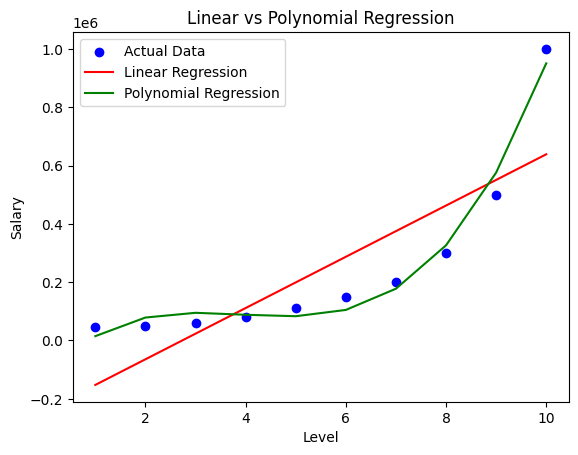

In [15]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, linear_reg.predict(X), color='red', label='Linear Regression')
plt.plot(X, poly_reg.predict(poly_features.transform(X)), color='green', label='Polynomial Regression')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Visualize results for all Regressions

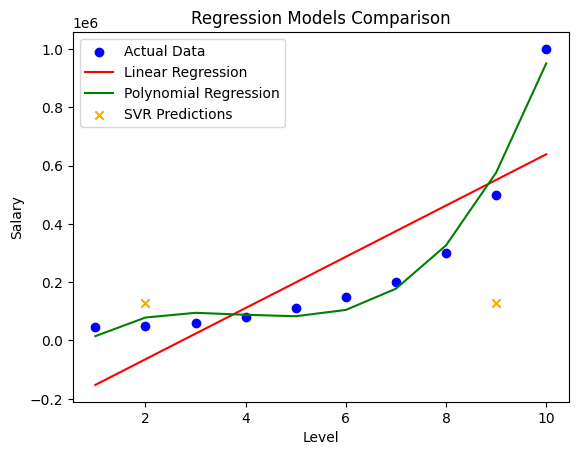

In [16]:
plt.scatter(X, y, color='blue', label='Actual Data')

# Linear Regression
plt.plot(X, linear_reg.predict(X), color='red', label='Linear Regression')

# Polynomial Regression
plt.plot(X, poly_reg.predict(poly_features.transform(X)), color='green', label='Polynomial Regression')

# SVR Regression
plt.scatter(X_test, y_pred_svr, color='orange', label='SVR Predictions', marker='x')

plt.title('Regression Models Comparison')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()